## **Simple linear regression - relation between heating and cooling loads**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

#### **1. Import data and checking**

In [44]:
#ds = pd.read_csv(".\\data\\energy.csv")
ds=pd.read_csv('https://raw.githubusercontent.com/sekhargullapalli/exploring-data-science/master/data/energy.csv')
print(ds.shape)
print(ds.head().iloc[:,0:3].to_markdown())
print(f"Missing values:{ds.isnull().values.any()}")

ds.describe()

(768, 10)
|    |   Relative Compactness |   Surface Area |   Wall Area |
|---:|-----------------------:|---------------:|------------:|
|  0 |                   0.98 |          514.5 |       294   |
|  1 |                   0.98 |          514.5 |       294   |
|  2 |                   0.98 |          514.5 |       294   |
|  3 |                   0.98 |          514.5 |       294   |
|  4 |                   0.9  |          563.5 |       318.5 |
Missing values:False


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


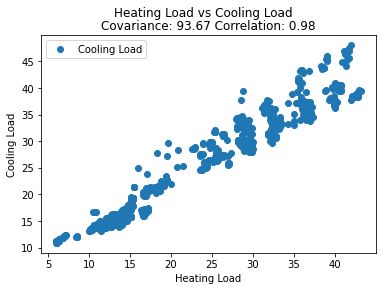

In [19]:
ds.plot(x='Heating Load', y='Cooling Load', style='o')  
plt.suptitle('Heating Load vs Cooling Load')  
cov =np.cov(ds['Heating Load'].values,ds['Cooling Load'].values)
cor =np.corrcoef(ds['Heating Load'].values,ds['Cooling Load'].values)
plt.title(f"Covariance: {cov[0,1]:.2f} Correlation: {cor[0,1]:.2f}")
plt.xlabel('Heating Load')  
plt.ylabel('Cooling Load')  
plt.show()

##### **Using seaborn for distribution plot**

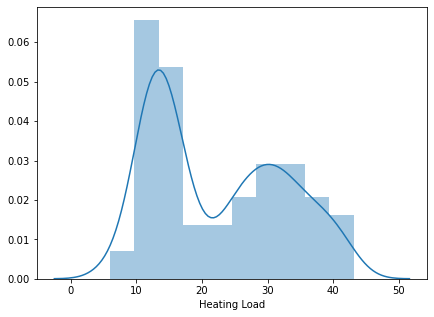

In [4]:
import seaborn as seabornInstance 
plt.figure(figsize=(7,5))
plt.tight_layout()
seabornInstance.distplot(ds['Heating Load'])


In [5]:
#reshaping datafram elements to column matrixes
hl=ds['Heating Load'].values.reshape(-1,1)
cl=ds['Cooling Load'].values.reshape(-1,1)

#### **2.Splitting the data and linear regression (using SKLEARN)**

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(hl,cl,test_size=0.2,random_state=0)
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,Y_train)
print(f'R-Squared (train): {lr.score(X_train, Y_train)}')
print(f'R-Squared (test): {lr.score(X_test, Y_test)}')
print(f'Coefficient: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')


R-Squared (train): 0.9530279860845231
R-Squared (test): 0.9492053027758003
Coefficient: [[0.92601266]]
Intercept: [3.97963505]


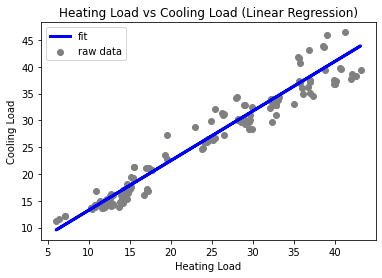

In [46]:
Y_pred = lr.predict(X_test)
res = pd.DataFrame(
    {
        'Cl_Actual':Y_test.flatten(),
        'Cl_Predicted':Y_pred.flatten(),        
    }
)
res['CL_Error_Rel_Per'] = (res.Cl_Predicted-res.Cl_Actual)/res.Cl_Actual*100
plt.scatter(X_test,Y_test,color='gray', label='raw data')
plt.plot(X_test,Y_pred,color='blue', linewidth=3, label='fit')
plt.title('Heating Load vs Cooling Load (Linear Regression)')  
plt.xlabel('Heating Load')  
plt.ylabel('Cooling Load')  
plt.legend(loc="upper left")

#### **3.Error Analysis (using metrics)**

In [8]:
print('Mean Absolute Error:', np.around(metrics.mean_absolute_error(Y_test, Y_pred),2))  
print('Mean Squared Error:', np.around(metrics.mean_squared_error(Y_test, Y_pred),2))  
print('Root Mean Squared Error:', np.around(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)),2))

Mean Absolute Error: 1.6
Mean Squared Error: 4.78
Root Mean Squared Error: 2.19


In [9]:
print("Relative Errors:")
res['CL_Error_Rel_Per'].describe(percentiles=np.arange(0,1,0.1))




Relative Errors:


count    154.000000
mean       1.364972
std        8.108920
min      -19.278821
0%       -19.278821
10%      -11.031560
20%       -5.144114
30%       -1.008085
40%        0.361788
50%        1.445766
60%        2.870220
70%        4.423738
80%        8.296316
90%       11.700780
max       21.756793
Name: CL_Error_Rel_Per, dtype: float64

#### **4. About Energy Dataset**
##### **As copied from [2]**
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


#### **5. References**

##### 1. A beginner's guide to linear regression in python with Scikit-Lean. Accessed Jul 28th,2020 [Link](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)

##### 2. [Energy Efficiency Dataset](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency?ref=datanews.io). A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012
